In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import math
%matplotlib inline

In [8]:
def function(x):
    ans = (x[0]-1)**2 + (x[1]-2)**2
    return ans

In [9]:
def function_b(a,b):
    a = np.array(a)
    b = np.array(b)
    ans = (a-1)**2 + (b-2)**2
    ans = list(ans)
    return ans

## Effect of C1, C2 and W

In [265]:
#Parameters 
num_particle = 20 #num_particles
b_up =-3 
b_low = 3

In [275]:
x = []
#initializing position of the particles
for i in range(num_particle):
  k = np.random.uniform(low=b_low, high=b_up, size=(1,2))[0]
  x.append(k)


g_best = x[0]

#finding global best
for i in range(num_particle):
    if function(x[i]) < function(g_best):
        g_best = x[i]

#initializing velocity of the particle
v = []
for i in range(num_particle):
    m = np.random.uniform(low=-abs(b_up-b_low), high=abs(b_up-b_low), size=(1,2))[0]
    v.append(m)

In [298]:
#Changes can be made here to experiment and study the effect of hyperparameters
max_iter = 200 
iteration = 0
w = 0.9
c1 = 2
c2 = 2

In [299]:
x_old = x.copy()
x_new = x.copy()
p_best = x.copy()
X_all = []

while(iteration<max_iter):
    for i in range(num_particle):
        X_all.append(x_old)
        for j in range(len(x[0])):
            r_p = np.random.uniform(0,1)
            r_g = np.random.uniform(0,1)
            v[i][j] = w*v[i][j] + c1*r_p*(p_best[i][j]-x_old[i][j]) + c2*r_g*(g_best[j]-x_old[i][j])
            
        x_new[i] = x_old[i] + v[i]
        if function(x_new[i]) < function(p_best[i]):
            p_best[i] = x_new[i]
            if function(p_best[i]) < function(g_best):
                g_best = p_best[i]

        x_old = x_new
        #w = w*0.98
        iteration = iteration + 1

In [300]:
g_best 

array([0.99944724, 1.9999601 ])

In [301]:
function(g_best)

3.071353261848422e-07

In [302]:
iteration

200

In [303]:
def coordinates(X,num_particles):
    x_par = []
    y_par = []

    for i in range(num_particles):
        x_par.append(X[i][0])
        y_par.append(X[i][1])
    return x_par,y_par

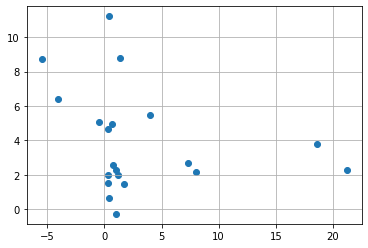

In [304]:
#Here the X_all[i] denotes the particle positions at ith iteration, the next cell must be run in continuation 
a,b = coordinates(X_all[199],20)
c = function_b(a,b)
plt.scatter(a,b)
plt.grid()
plt.show()

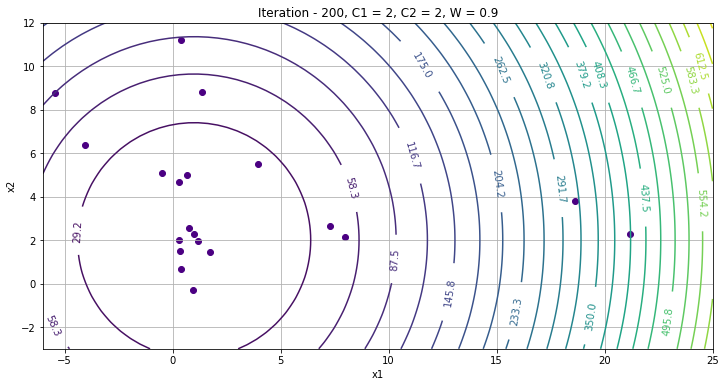

In [312]:
x1 = np.linspace(-6,25,70)
x2 = np.linspace(-3,12,70)
x1,x2 = np.meshgrid(x1,x2)
func = function_b(x1,x2)
fig, ax = plt.subplots()
levels = np.linspace(0,700,25)
CS = ax.contour(x1, x2, func, levels)
ax.clabel(CS, inline=1, fontsize=10)
ax.scatter(a,b,color='indigo')
fig.set_size_inches(12,6)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.title('Iteration - 200, C1 = 2, C2 = 2, W = 0.9')
plt.show()